**Quntum random number generator**

Unlike classical random nuber generator, quantum random number genrator does not depend on a formula. QRNG can be created by the superposition and mesurement.

First step is import the libraries.



In [2]:
!pip install qiskit
!pip install qiskit-Aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 106.2 MB/s eta 0:00:00


In [3]:
from qiskit import *
from qiskit_aer import *

**Generate a single Number**

To generate QRNG, we first create a superposition on all qubits and then we apply measurment.


In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
a=10
qc = QuantumCircuit(a,a )


for i in range(a):
     qc.h(i)
qc.measure_all()

backend = AerSimulator()
result = backend.run(qc, shots=1).result()

counts = result.get_counts()
print(counts)

{'1010101111 0000000000': 1}


This give us one binary state

In [5]:
qc.draw()

┌───┐ ░ ┌─┐                           
    q_0: ┤ H ├─░─┤M├───────────────────────────
         ├───┤ ░ └╥┘┌─┐                        
    q_1: ┤ H ├─░──╫─┤M├────────────────────────
         ├───┤ ░  ║ └╥┘┌─┐                     
    q_2: ┤ H ├─░──╫──╫─┤M├─────────────────────
         ├───┤ ░  ║  ║ └╥┘┌─┐                  
    q_3: ┤ H ├─░──╫──╫──╫─┤M├──────────────────
         ├───┤ ░  ║  ║  ║ └╥┘┌─┐               
    q_4: ┤ H ├─░──╫──╫──╫──╫─┤M├───────────────
         ├───┤ ░  ║  ║  ║  ║ └╥┘┌─┐            
    q_5: ┤ H ├─░──╫──╫──╫──╫──╫─┤M├────────────
         ├───┤ ░  ║  ║  ║  ║  ║ └╥┘┌─┐         
    q_6: ┤ H ├─░──╫──╫──╫──╫──╫──╫─┤M├─────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
    q_7: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├──────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
    q_8: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
    q_9: ┤ H ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
         └───┘ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
   c: 10/═════════╬══╬══╬══╬══╬══╬══╬══╬══╬══╬═
                  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ 
meas: 10/═════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                  0  1  2  3  4  5  6  7  8  9

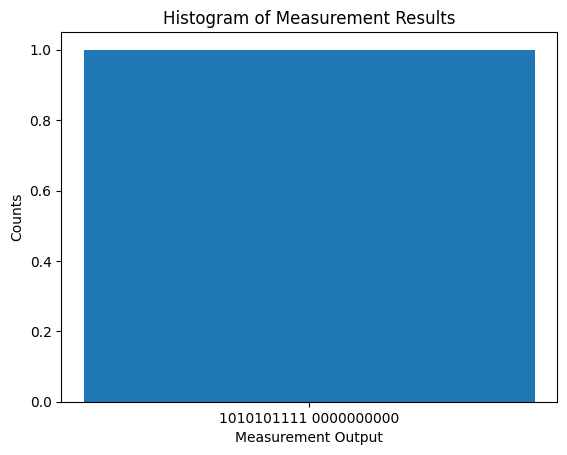

In [6]:
import matplotlib.pyplot as plt

# 'counts' will now be available from the previous cell's execution after it's re-run

plt.bar(counts.keys(), counts.values())
plt.xlabel("Measurement Output")
plt.ylabel("Counts")
plt.title("Histogram of Measurement Results")
plt.show()

Then we convert that binary number to integer.

In [8]:
counts = result.get_counts()
bitstring = list(counts.keys())[0]
print("Random output:", bitstring)
cleaned_bitstring = bitstring.replace(' ', '') # Remove spaces
integer = int(cleaned_bitstring, 2)
print("Integer:", integer)

Random output: 1010101111 0000000000
Integer: 703488


circuit to generate n random number

To generate one integer up to value M, you need:

\text{Number of bits} = \lceil \log_2(M+1) \rceil

Example:
To generate numbers up to 50, you need:

\lceil \log_2(51) \rceil = 6 \text{ bits (so 6 qubits)}

**Generate a multiple Number**

To generate QRNG, we run the above circuit as per our needs. Following code will create superposition and measure it as per our input. And we get new state each time.then we convert it to the integer.

In [9]:

def qrng_generate(N, bits_per_int):
    backend = Aer.get_backend('qasm_simulator')
    integers = []

    for _ in range(N):
        bitstring = ""
        for _ in range(bits_per_int):
            qc = QuantumCircuit(1, 1)
            qc.h(0)
            qc.measure(0, 0)

            result = backend.run(qc, shots=1).result().get_counts()
            bitstring += list(result.keys())[0]

        integers.append(int(bitstring, 2))

    return integers

print(qrng_generate(9, 4))

[9, 8, 14, 4, 2, 1, 13, 9, 6]


In this notebook, we create a random number using quantum principle.